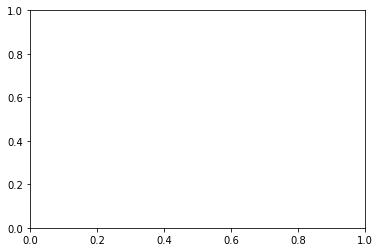

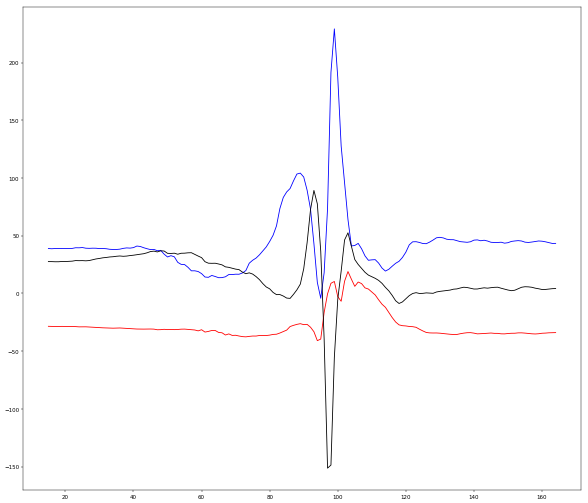

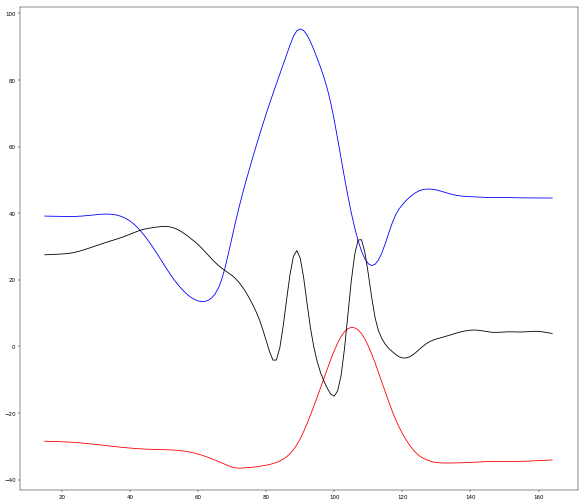

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from filtering import savitzky_golay

col_names = ['timestamp', 'X', 'Y', 'Z']
acc_data_reference = pd.read_csv('./reference-fd-bw/acc.csv', names=col_names)
# print(datetime.fromtimestamp((acc_data_forward['timestamp'][0]/1000.)))

TMP_START = 15
TMP_END = 165

xaxis = list(range(len(acc_data_reference)))[TMP_START:TMP_END]
x_reference = acc_data_reference['X']
# x_alt = savitzky_golay(list(x_reference), 31, 2)
y_reference = acc_data_reference['Y']
z_reference = acc_data_reference['Z']
fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference[TMP_START:TMP_END]), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference[TMP_START:TMP_END]), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference[TMP_START:TMP_END]), color="black", label="zaxis")
plt.show()

# reference data filtration
x_reference = savitzky_golay(list(x_reference), 21, 2)
x_reference = savitzky_golay(list(x_reference), 31, 2)
x_reference = x_reference[20:170]
y_reference = savitzky_golay(list(y_reference), 21, 2)
y_reference = savitzky_golay(list(y_reference), 31, 2)
z_reference = savitzky_golay(list(z_reference), 11, 2)
z_reference = savitzky_golay(list(z_reference), 21, 2)


fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference[TMP_START:TMP_END]), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference[TMP_START:TMP_END]), color="black", label="zaxis")
plt.show()
plt.legend()



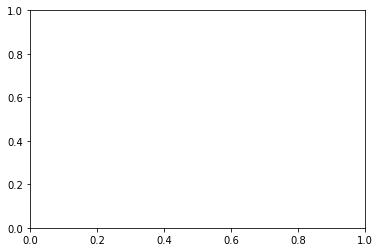

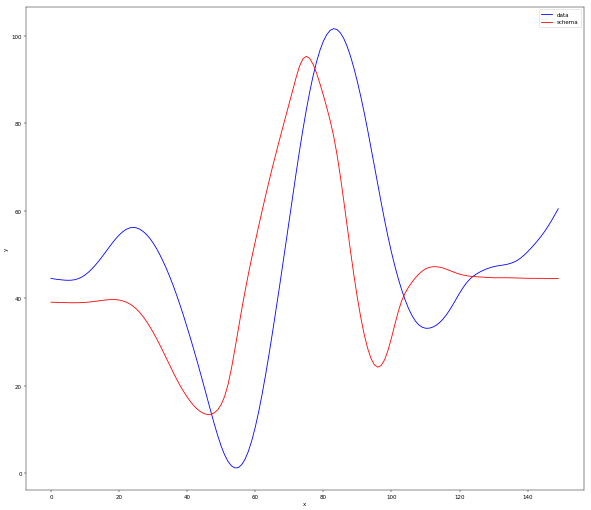

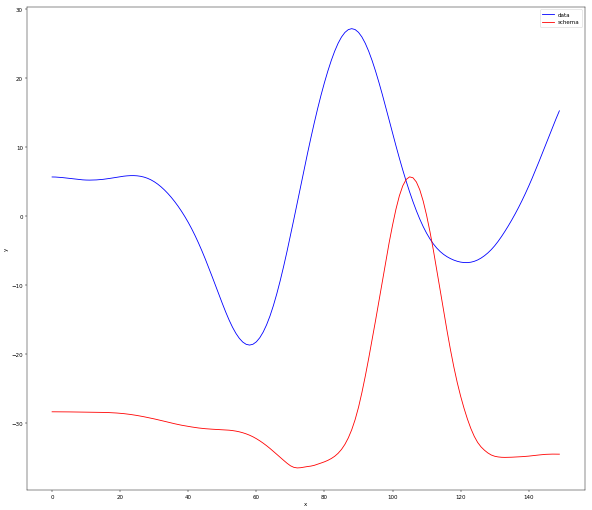

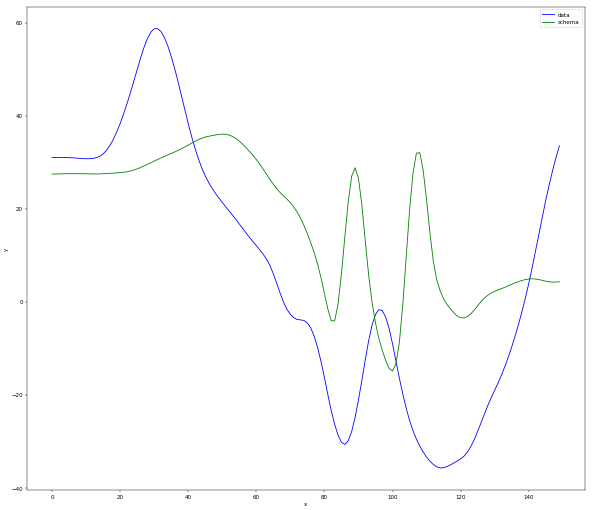

In [3]:

TMP_START = 0
TMP_END = 150

acc_data_forward = pd.read_csv('./amg-forward/acc.csv', names=col_names)
xaxis = list(range(len(acc_data_forward)))[TMP_START:TMP_END]

x_normal = acc_data_forward['X']
y_normal = acc_data_forward['Y']
z_normal = acc_data_forward['Z']


# forward data normalization
x_normal = savitzky_golay(list(x_normal), 21, 2)
x_normal = savitzky_golay(list(x_normal), 51, 2)
y_normal = savitzky_golay(list(y_normal), 31, 2)
y_normal = savitzky_golay(list(y_normal), 51, 2)
z_normal = savitzky_golay(list(z_normal), 11, 2)
z_normal = savitzky_golay(list(z_normal), 21, 2)


fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_normal[TMP_START:TMP_END]), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(x_reference[TMP_START:TMP_END]), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(y_normal[TMP_START:TMP_END]), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(y_reference[TMP_START:TMP_END]), color="red", label="schema")
# plt.plot(xaxis, np.rad2deg(z_normal), color="black", label="zaxis")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(z_normal[TMP_START:TMP_END]), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(z_reference[TMP_START:TMP_END]), color="green", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Populating the interactive namespace from numpy and matplotlib
24.31579338 0.408795738966


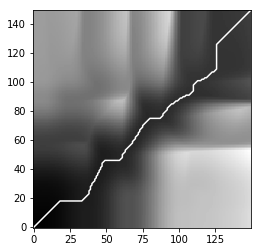

In [4]:
%pylab inline
from dtw import dtw

# DTW for X acc
k = x_normal[TMP_START:TMP_END]
n = x_reference[TMP_START:TMP_END]
dist, cost, acc, path = dtw(k, n, dist=lambda k, n: norm(k - n))
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
print(mean(acc), mean(cost))


50.2810950537 0.535682450749


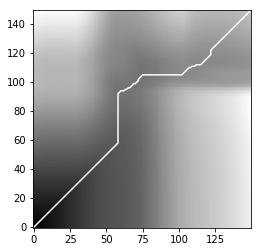

In [5]:
# DTW for Y acc
k = y_normal[TMP_START:TMP_END]
n = y_reference[TMP_START:TMP_END]
dist, cost, acc, path = dtw(k, n, dist=lambda k, n: norm(k - n))
print(mean(acc), mean(cost))
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

24.3007110991 0.481658058521


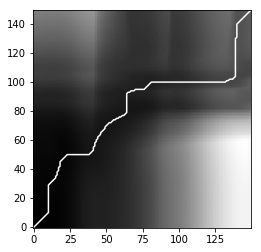

In [6]:
# DTW for Z acc
k = z_normal[TMP_START:TMP_END]
n = z_reference[TMP_START:TMP_END]
dist, cost, acc, path = dtw(k, n, dist=lambda k, n: norm(k - n))
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
# print(cost)
print(mean(acc), mean(cost))